<a href="https://colab.research.google.com/github/kakdeykaushik/categorize_rgb/blob/master/categorizeRGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
class CategorizeColor:


    def __init__(self, image, clusters):
        self.clusters = clusters
        self.image = image
        
    def categorize(self):
  
        img = cv2.imread(self.image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = img.reshape((img.shape[0] * img.shape[1], 3))
   
        self.image = img
        
        kmeans = KMeans(n_clusters = self.clusters)
        kmeans.fit(img)
        
        self.colors = kmeans.cluster_centers_
  

        return self.colors.astype(int)

In [3]:
# Enter valid Image path
img = "1x1-aero-two-color-background.jpg"
clusters = 1
dc = CategorizeColor(img, clusters) 
colors = dc.categorize()
print(colors)

[[124 185 232]]


In [0]:
rgb_list = colors.tolist()

# converting rgb_list into plottable format
list_to_plot = [tuple(i) for i in rgb_list] 

# Custom argmax() to get idx of max value in list
argmax = max(zip(list_to_plot[0], range(len(list_to_plot[0]))))[1]

In [0]:
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0, 255)

top_match = [red, green, blue][argmax]


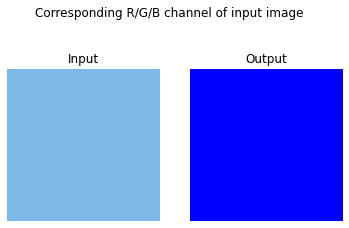

In [6]:
# Plotting the Result

fig, axs = plt.subplots(1, 2)
axs[0].imshow([list_to_plot])
axs[0].axis('off')
axs[0].set_title('Input')


axs[1].imshow([[top_match]])
axs[1].axis('off')
axs[1].set_title('Output')

fig.suptitle("Corresponding R/G/B channel of input image");